In [74]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import NearestCentroid
import matplotlib.pyplot as plt

In [75]:
# Function to normalize stopping locations

def normalize_stoppings(stoppings):
    scalar = StandardScaler()
    normalized_stoppings = scalar.fit_transform(stoppings)
    return normalized_stoppings

In [76]:
# Function to cluster stopping locations using DBSCAN

def clusterStopping(stoppings, eps=0.5, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(stoppings)
    return labels

In [77]:
stoppings = [[11.681464258770998, 78.17254968320249],
[11.679267052270484, 78.1723364475898],
[11.682740498128405, 78.17150336969115],
[11.67839912444212, 78.17100105551883],
[11.677386493952655, 78.17045683419356],
[11.681467421842676, 78.16761104292452],
[11.68141996128395, 78.16806842505518],
[11.682545176627789, 78.16766004611661],
[11.681667443562038, 78.16612656550059],
[11.681049350410435, 78.16576431770304],
[11.680912345672341, 78.17210458932145],
[11.679845237894562, 78.17189233455678],
[11.682154987341256, 78.17124566789012],
[11.678912334556789, 78.17093455678123],
[11.677945667812345, 78.17061233499876],
[11.681123445678912, 78.16894566781234],
[11.681789234556781, 78.16841233455678],
[11.682312345667891, 78.16793455678123],
[11.681456789234567, 78.16678923455678],
[11.680834556781234, 78.16594566781234],
[11.679456781234567, 78.17155678923456],
[11.678789234556781, 78.17012344567891],
[11.677912345667891, 78.16967891234567],
[11.682678912345678, 78.16823455678123],
[11.681034556781234, 78.16734567891234],
[11.680245781234, 78.172345667891],
[11.679834556712, 78.172012345678],
[11.682145678912, 78.171845234567],
[11.681567234589, 78.171234556781],
[11.678934556781, 78.170845234567],
[11.677845234567, 78.170534556781],
[11.676934556781, 78.170123445678],
[11.681345678912, 78.168934556781],
[11.681934556781, 78.168512345678],
[11.682345234567, 78.168145678912],
[11.681734556781, 78.167456789234],
[11.680934556781, 78.167045678912],
[11.680345678912, 78.166612345678],
[11.679834556781, 78.166234556781],
[11.679245678912, 78.165845234567],
[11.678734556781, 78.165456789234],
[11.677934556781, 78.165123445678],
[11.676845234567, 78.164845678912],
[11.682734556781, 78.169234567891],
[11.682145234567, 78.169845678912],
[11.681456789234, 78.170345678912],
[11.680845678912, 78.170734556781],
[11.679345678912, 78.171045678912],
[11.678245678912, 78.171345234567],
[11.677345678912, 78.171734556781],
[11.676734556781, 78.172045678912],
[11.682934556781, 78.166845234567],
[11.682345678912, 78.165934556781],
[11.681845234567, 78.165234556781],
[11.680945678912, 78.164734556781]]

stoppings = np.array(stoppings)

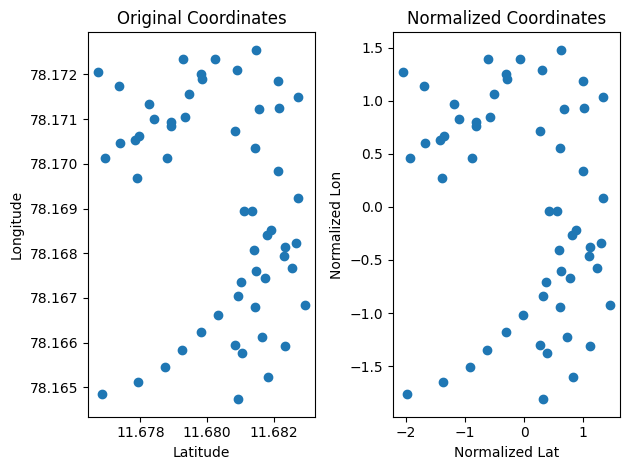

In [78]:
normalizedStoppings = normalize_stoppings(stoppings)
plt.subplot(1,2,2)
plt.scatter(normalizedStoppings[:,0], normalizedStoppings[:,1])
plt.title("Normalized Coordinates")
plt.xlabel("Normalized Lat")
plt.ylabel("Normalized Lon")

plt.subplot(1,2,1)
plt.scatter(stoppings[:,0], stoppings[:,1])
plt.title("Original Coordinates")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.tight_layout()
plt.show()

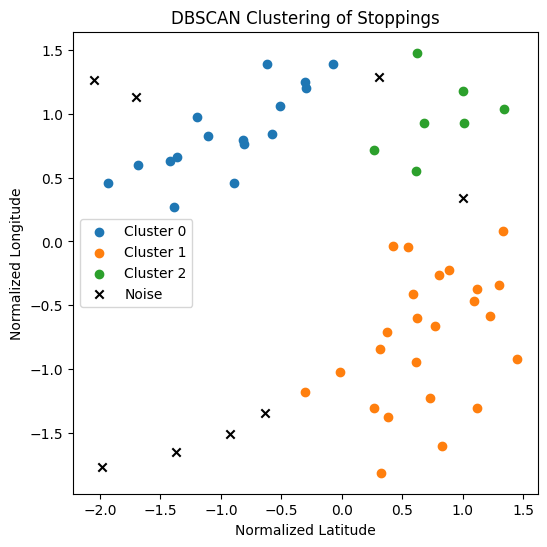

In [79]:
labels = clusterStopping(normalizedStoppings)

plt.figure(figsize=(6,6))

unique_labels = set(labels)

for label in unique_labels:
    mask = labels == label

    if label == -1:
        plt.scatter(
            normalizedStoppings[mask, 0],
            normalizedStoppings[mask, 1],
            c='black',
            marker='x',
            label='Noise'
        )
    else:
        plt.scatter(
            normalizedStoppings[mask, 0],
            normalizedStoppings[mask, 1],
            label=f'Cluster {label}'
        )

    

plt.xlabel("Normalized Latitude")
plt.ylabel("Normalized Longitude")
plt.title("DBSCAN Clustering of Stoppings")
plt.legend()
plt.show()

In [80]:
def mergeNoiceWithNearestCluster(normalizedStoppings, labels):
    noise_mask = labels == -1
    cluster_mask = labels != -1

    centroids = NearestCentroid().fit(
        normalizedStoppings[cluster_mask],
        labels[cluster_mask]
    )

    noise_points = normalizedStoppings[noise_mask]
    if len(noise_points) > 0:
        nearest_clusters = centroids.predict(noise_points)
        labels[noise_mask] = nearest_clusters

    return labels


In [81]:
labels = mergeNoiceWithNearestCluster(normalizedStoppings, labels)
print(labels)

[2 0 2 0 0 1 1 1 1 1 2 0 2 0 0 1 1 1 1 1 0 0 0 1 1 0 0 2 2 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 2 2 2 0 0 0 0 1 1 1 1]


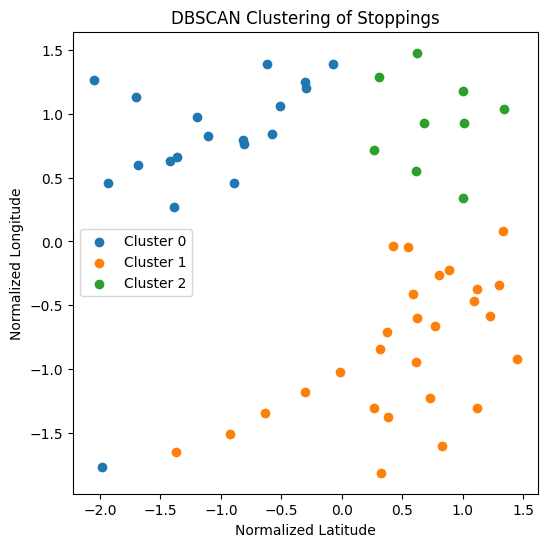

In [82]:
plt.figure(figsize=(6,6))

unique_labels = set(labels)

for label in unique_labels:
    mask = labels == label

    if label == -1:
        plt.scatter(
            normalizedStoppings[mask, 0],
            normalizedStoppings[mask, 1],
            c='black',
            marker='x',
            label='Noise'
        )
    else:
        plt.scatter(
            normalizedStoppings[mask, 0],
            normalizedStoppings[mask, 1],
            label=f'Cluster {label}'
        )

    

plt.xlabel("Normalized Latitude")
plt.ylabel("Normalized Longitude")
plt.title("DBSCAN Clustering of Stoppings")
plt.legend()
plt.show()